# BL40A2010 Introduction to IoT-Based Systems

## Assignment 4, 19.09.2023

### Author: Hamed Ahmadinia

**(1) Draw a graph with star topology with five nodes (one in the center $A$, four in the edges $B$-$E$).
If the topology is directed as a many-to-one topology, write the structure of awareness of the system, considering that nodes $B$-$E$ acquire and process data about a supporting reality $T$, while $A$ can only receive data from it. Remember the notation $Xy$ means the image of $X$ by $Y$.**

In [12]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
#Import libraries
import networkx as nx
import matplotlib.pyplot as plt 
import scipy as sp
import numpy as np

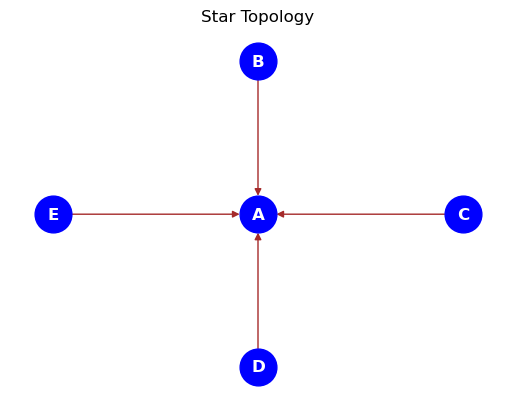

-----------------------------------------------------------------------------------------------------------
Structure of awareness:
Nodes B to E acquire and process data about a supporting reality T. Thus, we have B_T, C_T, D_T, and E_T.
Node A only receives data. Thus, it has the awareness A_{B_T}, A_{C_T}, A_{D_T}, and A_{E_T}.
-----------------------------------------------------------------------------------------------------------
Awareness of nodes B to E: ['B_T', 'C_T', 'D_T', 'E_T']
Awareness of node A: ['A_{B_T}', 'A_{C_T}', 'A_{D_T}', 'A_{E_T}']
-----------------------------------------------------------------------------------------------------------


In [38]:
G = nx.DiGraph()

nodes = ['A', 'B', 'C', 'D', 'E']
G.add_nodes_from(nodes)

for node in nodes[1:]:
    G.add_edge(node, 'A')

pos = {
    'A': (0, 0),
    'B': (0, 1),
    'C': (1, 0),
    'D': (0, -1),
    'E': (-1, 0)
}

nx.draw_networkx(G, pos, node_color='Blue', font_color='White', edge_color='Brown', font_weight='bold', node_size=700)

awareness_B_to_E = [f"{node}_T" for node in nodes[1:]]
awareness_A = [f"A_{{{awareness}}}" for awareness in awareness_B_to_E]

plt.axis('off')
plt.title('Star Topology')
plt.show()

print("\033[1m" +"Structure of awareness:"+ "\033[0m")
print("Nodes B to E acquire and process data about a supporting reality T. Thus, we have B_T, C_T, D_T, and E_T.")
print("Node A only receives data. Thus, it has the awareness A_{B_T}, A_{C_T}, A_{D_T}, and A_{E_T}.")
print("-----------------------------------------------------------------------------------------------------------")
print("\033[1m" +"Awareness of nodes B to E:"+ "\033[0m", awareness_B_to_E)
print("\033[1m" +"Awareness of node A:"+ "\033[0m", awareness_A)
print("-----------------------------------------------------------------------------------------------------------")

**(2) Assume that graph illustrate a scenario of four sensor nodes that also (pre-)process data and one aggregator node as follows. Nodes $B$ and $C$ monitor temperature and wind speed at Airport station in Lappeenranta, respectively. Nodes $D$ and $E$ monitor temperature and wind speed at Lepola station in Lappeenranta, respectively. Nodes $B$ and $D$ send a binary message to $A$ indicating if during that period the temperature was more than $25$ degrees ("1" means above, "0" means below or equal to). Likewise nodes $C$ and $E$ send a binary message to $A$ indicating if during that period the wind speed was more than $5$ m/s ("1" means above, "0" means below or equal to). Download and plot the data from [FMI](http://en.ilmatieteenlaitos.fi/download-observations\#!/) with 1 hour resolution during July, 2018. Using this data, plot the binary signals sent from the nodes $B$-$E$ to the aggregator $A$.**

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
airport_temp_df = pd.read_csv("Lappeenranta lentoasema Temp 1.7.2018-31.7.2018.csv", sep=",", 
                          header=0,decimal=b".",index_col=0,
                          parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
airport_wind_df = pd.read_csv("Lappeenranta lentoasema Wind speed 1.7.2018-31.7.2018.csv", sep=",", 
                          header=0,decimal=b".",index_col=0,
                          parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
lepola_temp_df = pd.read_csv("Lappeenranta Lepola Temp 1.7.2018-31.7.2018.csv", sep=",", 
                          header=0,decimal=b".",index_col=0,
                          parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
lepola_wind_df = pd.read_csv("Lappeenranta Lepola wind speed 1.7.2018-31.7.2018.csv", sep=",", 
                          header=0,decimal=b".",index_col=0,
                          parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])

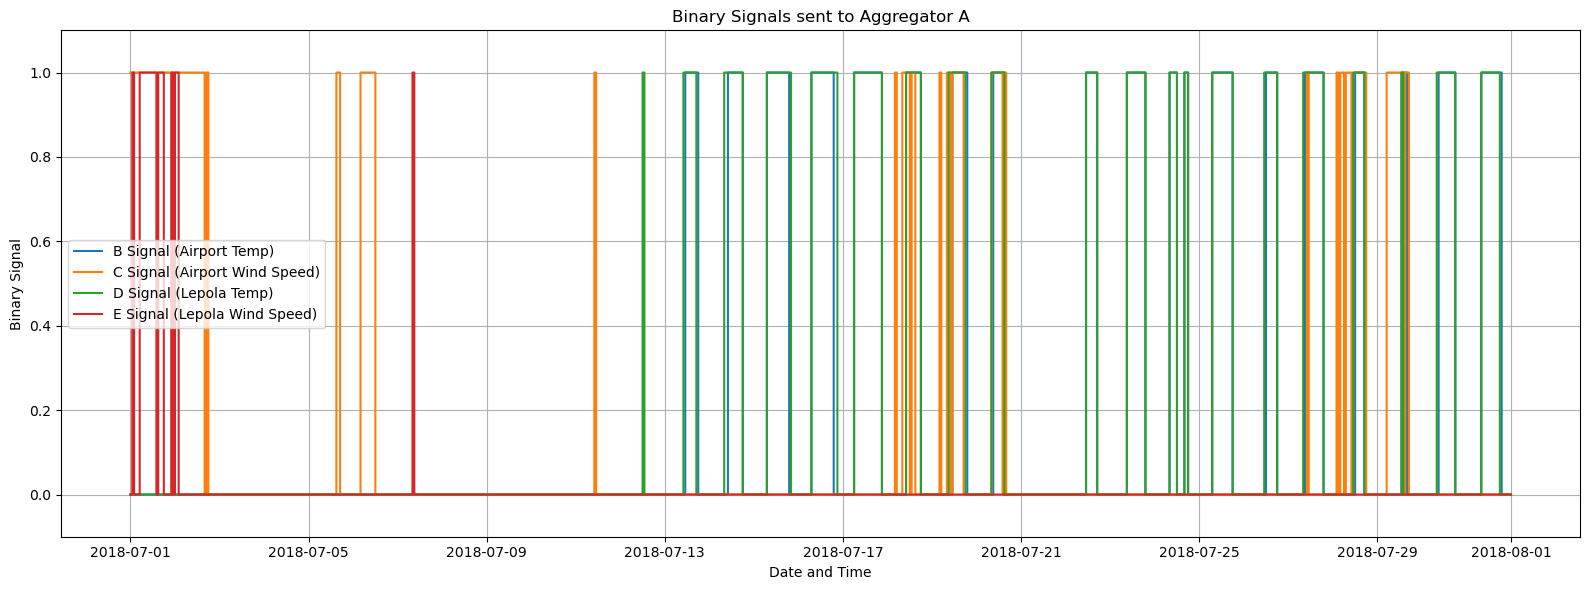

In [112]:
# Pre-process data to get the binary signals
airport_temp_df['B_signal'] = (airport_temp_df['Air temperature (degC)'] > 25).astype(int)
airport_wind_df['C_signal'] = (airport_wind_df['Wind speed (m/s)'] > 5).astype(int)
lepola_temp_df['D_signal'] = (lepola_temp_df['Air temperature (degC)'] > 25).astype(int)
lepola_wind_df['E_signal'] = (lepola_wind_df['Wind speed (m/s)'] > 5).astype(int)

# Plot the binary signals sent to Aggregator A
fig, ax = plt.subplots(figsize=(16, 6))

# Plotting each binary signal
ax.step(airport_temp_df.index, airport_temp_df['B_signal'], label='B Signal (Airport Temp)', where='post')
ax.step(airport_wind_df.index, airport_wind_df['C_signal'], label='C Signal (Airport Wind Speed)', where='post')
ax.step(lepola_temp_df.index, lepola_temp_df['D_signal'], label='D Signal (Lepola Temp)', where='post')
ax.step(lepola_wind_df.index, lepola_wind_df['E_signal'], label='E Signal (Lepola Wind Speed)', where='post')

# Formatting the plot
ax.set_ylabel('Binary Signal')
ax.set_xlabel('Date and Time')
ax.set_title('Binary Signals sent to Aggregator A')
ax.legend(loc='best')
ax.grid(True)
ax.set_ylim([-0.1, 1.1])  # Set y limits for clarity

plt.tight_layout()
plt.show()

In [113]:
# Analyzing the Data and Printing Insights
high_temp_airport_count = airport_temp_df['B_signal'].sum()
high_wind_airport_count = airport_wind_df['C_signal'].sum()
high_temp_lepola_count = lepola_temp_df['D_signal'].sum()
high_wind_lepola_count = lepola_wind_df['E_signal'].sum()

print(f"Number of high temperature events at Airport: {high_temp_airport_count}")
print(f"Number of high wind speed events at Airport: {high_wind_airport_count}")
print(f"Number of high temperature events at Lepola: {high_temp_lepola_count}")
print(f"Number of high wind speed events at Lepola: {high_wind_lepola_count}")

# Comparative Analysis
if high_temp_airport_count > high_temp_lepola_count:
    print("Airport reported higher temperatures more frequently than Lepola.")
elif high_temp_airport_count < high_temp_lepola_count:
    print("Lepola reported higher temperatures more frequently than Airport.")
else:
    print("Both Airport and Lepola reported high temperatures with similar frequency.")

if high_wind_airport_count > high_wind_lepola_count:
    print("Airport reported high wind speeds more frequently than Lepola.")
elif high_wind_airport_count < high_wind_lepola_count:
    print("Lepola reported high wind speeds more frequently than Airport.")
else:
    print("Both Airport and Lepola reported high wind speeds with similar frequency.")

# Simultaneous Events
simultaneous_events_airport = (airport_temp_df['B_signal'] & airport_wind_df['C_signal']).sum()
simultaneous_events_lepola = (lepola_temp_df['D_signal'] & lepola_wind_df['E_signal']).sum()
print(f"Number of simultaneous high temperature and wind events at Airport: {simultaneous_events_airport}")
print(f"Number of simultaneous high temperature and wind events at Lepola: {simultaneous_events_lepola}")

# Data Integrity
if high_temp_airport_count == 0 or high_wind_airport_count == 0:
    print("Potential sensor malfunction at Airport; continuous signal observed.")
if high_temp_lepola_count == 0 or high_wind_lepola_count == 0:
    print("Potential sensor malfunction at Lepola; continuous signal observed.")

Number of high temperature events at Airport: 153
Number of high wind speed events at Airport: 100
Number of high temperature events at Lepola: 162
Number of high wind speed events at Lepola: 17
Lepola reported higher temperatures more frequently than Airport.
Airport reported high wind speeds more frequently than Lepola.
Number of simultaneous high temperature and wind events at Airport: 23
Number of simultaneous high temperature and wind events at Lepola: 0


C:\Users\hamed\AppData\Local\Temp\ipykernel_880\3968492856.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax1.plot(airport_wind_df['2018-7-15']>5,color='black', marker='o',linestyle='')
C:\Users\hamed\AppData\Local\Temp\ipykernel_880\3968492856.py:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax2.plot(airport_temp_df['2018-7-15']>25,color='red', marker='x',linestyle='')


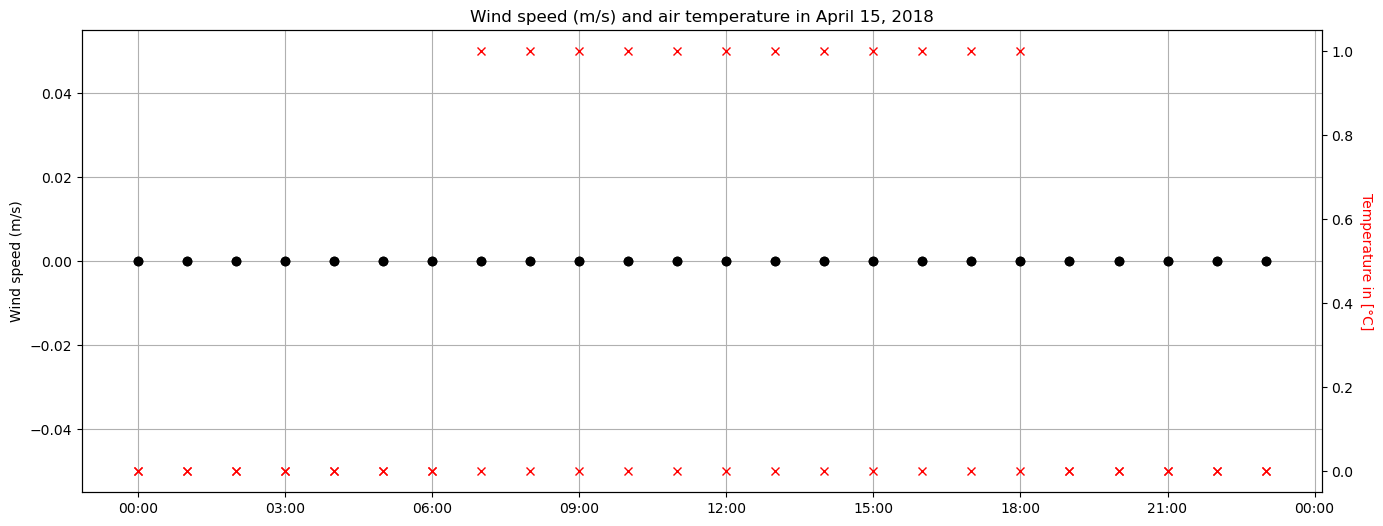

In [114]:
#subplot function
#https://matplotlib.org/2.0.1/examples/api/two_scales.html
####
fig, ax1 = plt.subplots(figsize=(16,6))
#left axis
ax1.set_ylabel("Wind speed (m/s)", color='black')
ax1.plot(airport_wind_df['2018-7-15']>5,color='black', marker='o',linestyle='') 

#right axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel("Temperature in [°C]", color='red',rotation=270,va="bottom")  
ax2.plot(airport_temp_df['2018-7-15']>25,color='red', marker='x',linestyle='')

#
ax1.grid(True)
plt.title("Wind speed (m/s) and air temperature in April 15, 2018") #title     
#change x axis
xfmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
#
plt.show()
#NOTE the "1" is different in the different energy and the temperature plots (check scales)

C:\Users\hamed\AppData\Local\Temp\ipykernel_880\1106402133.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax1.plot(lepola_wind_df['2018-7-15']>5,color='blue', marker='o',linestyle='')
C:\Users\hamed\AppData\Local\Temp\ipykernel_880\1106402133.py:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax2.plot(lepola_temp_df['2018-7-15']>25,color='Brown', marker='x',linestyle='')


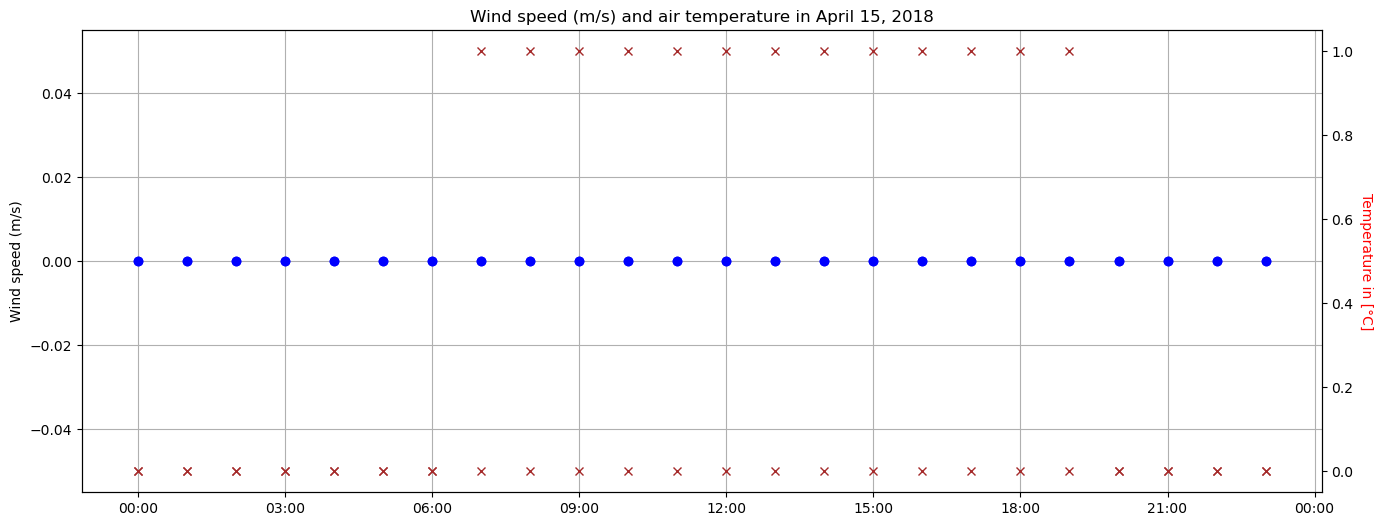

In [115]:
#subplot function
#https://matplotlib.org/2.0.1/examples/api/two_scales.html
####
fig, ax1 = plt.subplots(figsize=(16,6))
#left axis
ax1.set_ylabel("Wind speed (m/s)", color='black')
ax1.plot(lepola_wind_df['2018-7-15']>5,color='blue', marker='o',linestyle='') 

#right axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel("Temperature in [°C]", color='red',rotation=270,va="bottom")  
ax2.plot(lepola_temp_df['2018-7-15']>25,color='Brown', marker='x',linestyle='')
#
ax1.grid(True)
plt.title("Wind speed (m/s) and air temperature in April 15, 2018") #title     
#change x axis
xfmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
#
plt.show()
#NOTE the "1" is different in the different energy and the temperature plots (check scales)

C:\Users\hamed\AppData\Local\Temp\ipykernel_880\3262350632.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax1.plot(airport_wind_df['2018-7-29']>5,color='red', marker='o',linestyle='')
C:\Users\hamed\AppData\Local\Temp\ipykernel_880\3262350632.py:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax1.plot(lepola_wind_df['2018-7-29']>5,color='red', marker='o',linestyle='')
C:\Users\hamed\AppData\Local\Temp\ipykernel_880\3262350632.py:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax2.

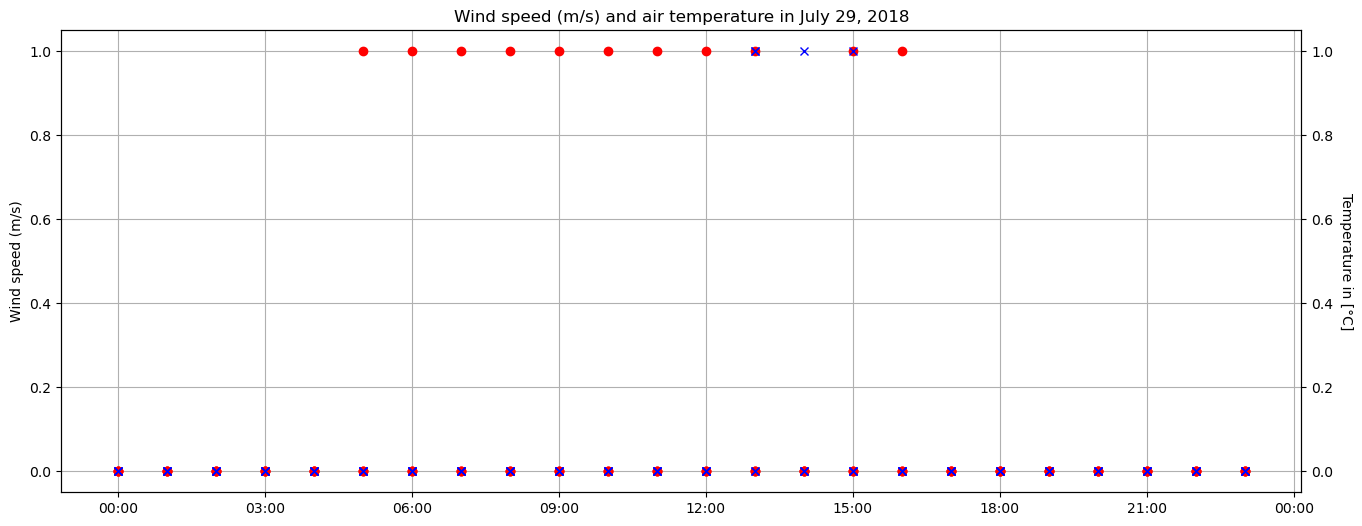

In [116]:
#subplot function
#https://matplotlib.org/2.0.1/examples/api/two_scales.html
####
fig, ax1 = plt.subplots(figsize=(16,6))
#left axis
ax1.set_ylabel("Wind speed (m/s)", color='black')
ax1.plot(airport_wind_df['2018-7-29']>5,color='red', marker='o',linestyle='') 
ax1.plot(lepola_wind_df['2018-7-29']>5,color='red', marker='o',linestyle='') 
#right axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel("Temperature in [°C]", color='black',rotation=270,va="bottom")  
ax2.plot(airport_temp_df['2018-7-29']>25,color='blue', marker='x',linestyle='')
ax2.plot(lepola_temp_df['2018-7-29']>25,color='blue', marker='x',linestyle='')
#
ax1.grid(True)
plt.title("Wind speed (m/s) and air temperature in July 29, 2018") #title     
#change x axis
xfmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
#
plt.show()

**(3) Node $A$ needs to identify risky situations in Lappeenranta when the temperature is above $25$ degrees and the wind is above $5$ m/s based on the sensors' signals. If a risky situation is identified at node $A$ as binary number "1" while normal situations as "0". How would you solve this problem? Plot the output signal from node $A$ and discuss its relation to the input signals from $B$-$E$.**

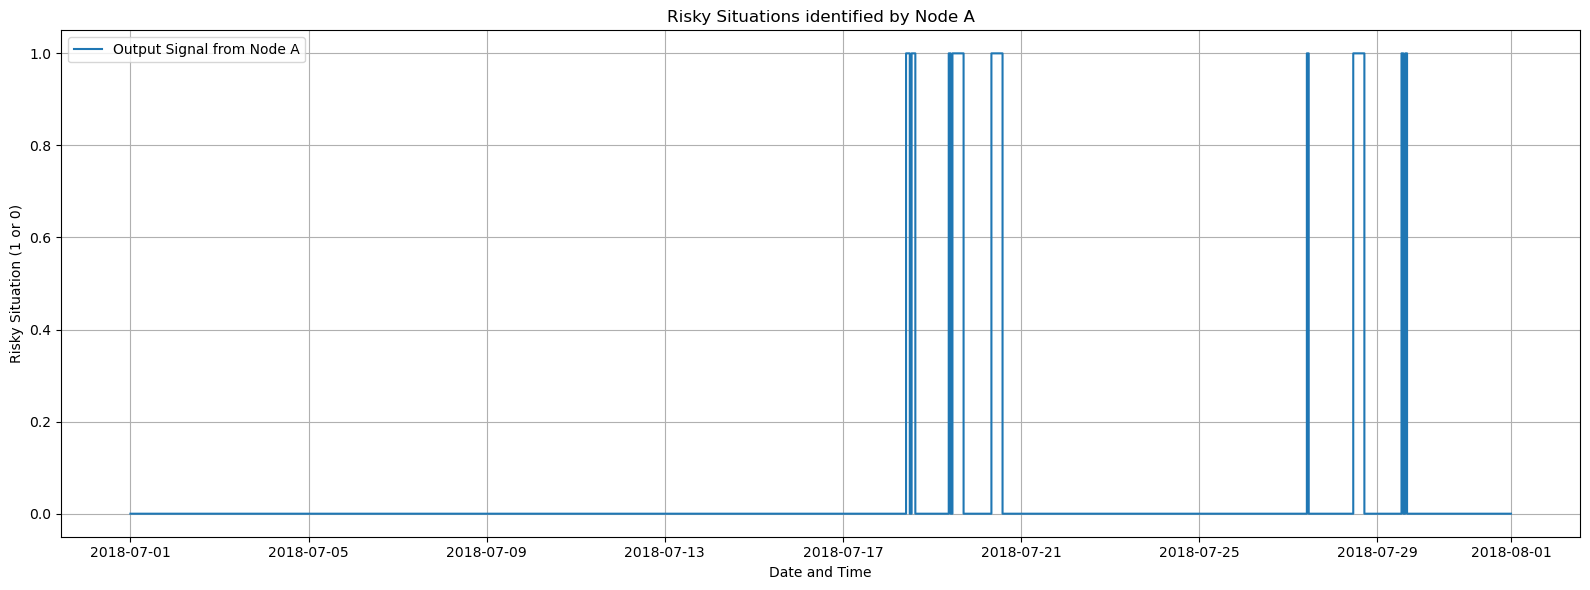

In [107]:
combined_temp_signal = (airport_temp_df['B_signal'] | lepola_temp_df['D_signal'])

combined_wind_signal = (airport_wind_df['C_signal'] | lepola_wind_df['E_signal'])

risky_signal = (combined_temp_signal & combined_wind_signal)

fig, ax = plt.subplots(figsize=(16, 6))
ax.step(risky_signal.index, risky_signal, label='Output Signal from Node A', where='post')
ax.set_ylabel('Risky Situation (1 or 0)')
ax.set_xlabel('Date and Time')
ax.set_title('Risky Situations identified by Node A')
ax.legend(loc='best')
ax.grid(True)
plt.tight_layout()
plt.show()

In [109]:
risky_periods = np.sum(risky_signal)
total_periods = len(risky_signal)
risk_percentage = (risky_periods/total_periods) * 100

print(f"Out of {total_periods} periods, {risky_periods} were identified as risky. This is {risk_percentage:.2f}% of the time.")
print("\nDiscussion:")
print("- Input Signals from B-E represent the raw sensor data indicating if specific thresholds are breached.")
print("- The Output Signal from Node A identifies risky situations by combining data from all sensors.")
print("- A '1' in the output signal from Node A means there's a temperature above 25 degrees and wind speed above 5 m/s at at least one location.")
print(f"- The results show that Lappeenranta faced risky situations {risk_percentage:.2f}% of the time during the monitored period.")
print("- Such combined processing can be crucial in real-world scenarios to trigger safety measures or warnings when multiple risk factors converge.")

Out of 745 periods, 26 were identified as risky. This is 3.49% of the time.

Discussion:
- Input Signals from B-E represent the raw sensor data indicating if specific thresholds are breached.
- The Output Signal from Node A identifies risky situations by combining data from all sensors.
- A '1' in the output signal from Node A means there's a temperature above 25 degrees and wind speed above 5 m/s at at least one location.
- The results show that Lappeenranta faced risky situations 3.49% of the time during the monitored period.
- Such combined processing can be crucial in real-world scenarios to trigger safety measures or warnings when multiple risk factors converge.
